# Does global signal regression result in a mean time series of zeros?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nilearn import masking, plotting

sns.set_style("whitegrid")

In [2]:
def regress_global_signal(data, add_random=0):
    """Regress global signal out of a time-by-voxels array, optionally with random regressors added."""
    # mean-center the data before regression
    data_dm = data - np.mean(data, axis=0)

    # get the global signal (mean over voxels)
    global_signal = np.mean(data_dm, axis=1)

    # the design matrix needs to be 2D, so add a singleton dimension
    design_matrix = global_signal[:, None]
    
    if add_random:
        random_regressors = np.random.random((data_dm.shape[0], add_random))
        random_regressors -= np.mean(random_regressors, axis=0)
        design_matrix = np.hstack((design_matrix, random_regressors))
    
    # run the regression
    betas, residuals, rank, s = np.linalg.lstsq(design_matrix, data_dm, rcond=None)
    
    # denoise the data
    predicted_data = np.dot(design_matrix, betas)
    denoised_data = data_dm - predicted_data
    return denoised_data, global_signal

In [3]:
in_file = (
    "/Users/taylor/Documents/datasets/ds003643/derivatives/fmriprep/sub-EN100/func/"
    "sub-EN100_task-lppEN_run-1_desc-preproc_bold.nii.gz"
)
mask = (
    "/Users/taylor/Documents/datasets/ds003643/derivatives/fmriprep/sub-EN100/func/"
    "sub-EN100_task-lppEN_run-1_desc-brain_mask.nii.gz"
)

# get the masked data as a numpy array
data = masking.apply_mask(in_file, mask)

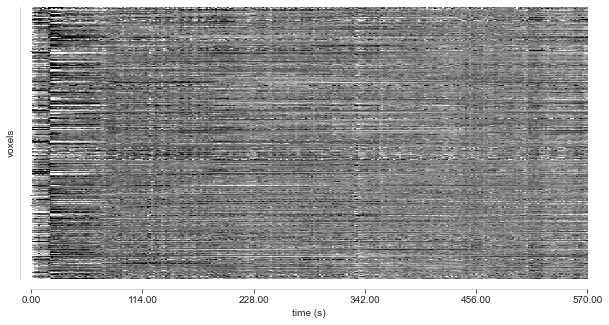

In [4]:
display = plotting.plot_carpet(in_file, mask)

## Global signal regression using the whole brain

<ipython-input-5-d2173b9d62f5>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


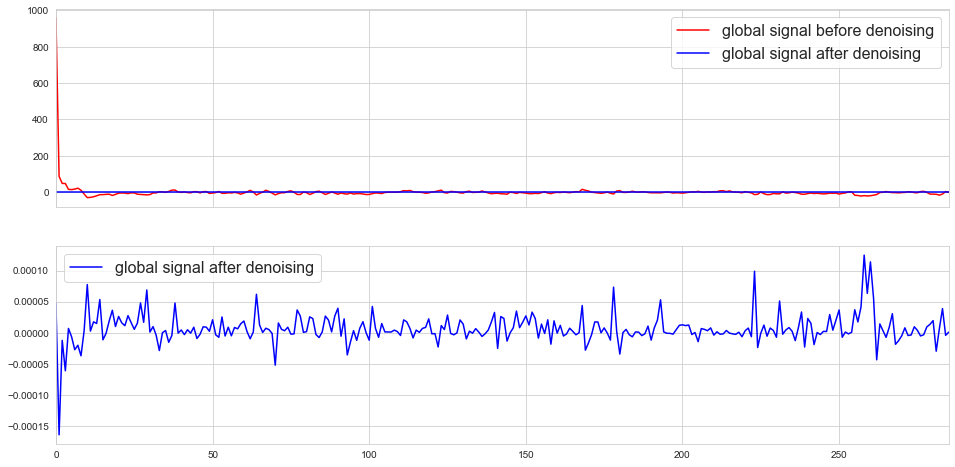

In [5]:
denoised_data, orig_global_signal = regress_global_signal(data)
denoised_global_signal = np.mean(denoised_data, axis=1)

fig, axes = plt.subplots(figsize=(16, 8), nrows=2, sharex=True)
axes[0].plot(orig_global_signal, color="red", label="global signal before denoising")
axes[0].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[0].legend(fontsize=16)
axes[0].set_xlim(0, data.shape[0] - 1)
axes[1].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[1].legend(fontsize=16)
fig.show()

## Global signal using one voxel

In this case, the denoised data's global signal is all zeros.

<ipython-input-6-538037e37f87>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


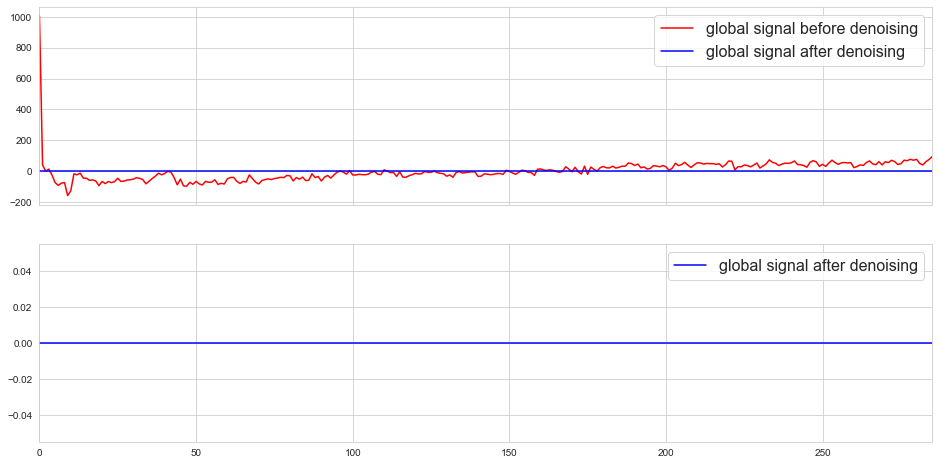

In [6]:
temp_data = data[:, 5000:5001]
denoised_data, orig_global_signal = regress_global_signal(temp_data)
denoised_global_signal = np.mean(denoised_data, axis=1)

fig, axes = plt.subplots(figsize=(16, 8), nrows=2, sharex=True)
axes[0].plot(orig_global_signal, color="red", label="global signal before denoising")
axes[0].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[0].legend(fontsize=16)
axes[0].set_xlim(0, data.shape[0] - 1)
axes[1].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[1].legend(fontsize=16)
fig.show()

## Global signal using two voxels

<ipython-input-7-76fed9b06db1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


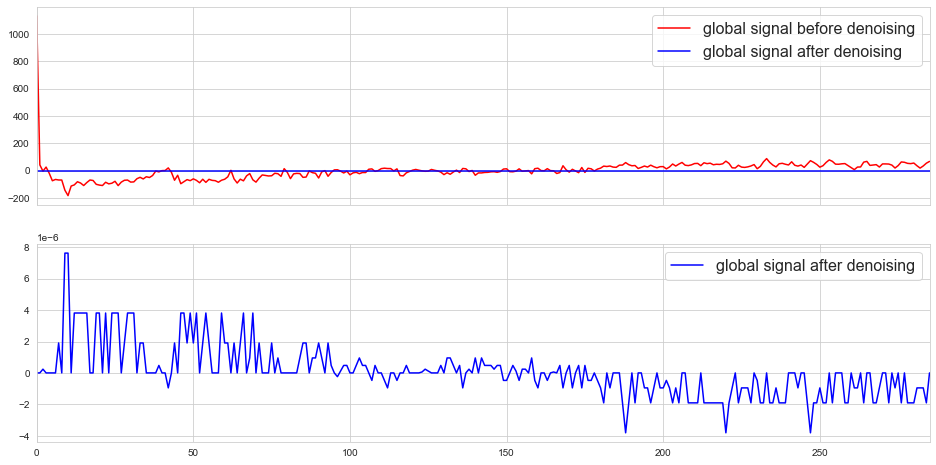

In [7]:
temp_data = data[:, 5000:5002]
denoised_data, orig_global_signal = regress_global_signal(temp_data)
denoised_global_signal = np.mean(denoised_data, axis=1)

fig, axes = plt.subplots(figsize=(16, 8), nrows=2, sharex=True)
axes[0].plot(orig_global_signal, color="red", label="global signal before denoising")
axes[0].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[0].legend(fontsize=16)
axes[0].set_xlim(0, data.shape[0] - 1)
axes[1].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[1].legend(fontsize=16)
fig.show()

## What about adding other regressors?

If we include other regressors beyond global signal, does that impact the denoised time series?

Yes, it does. The denoised time series, even when only denoising a single voxel, is no longer all zeros.

<ipython-input-8-c14195d9f406>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


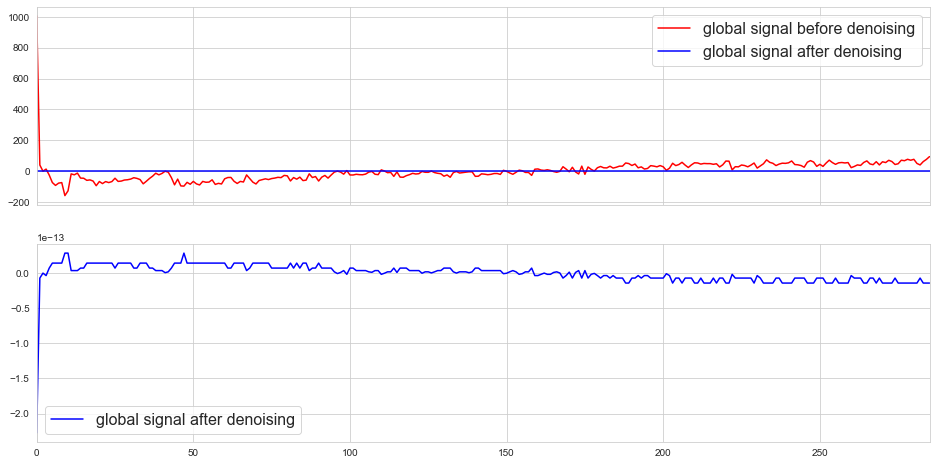

In [8]:
temp_data = data[:, 5000:5001]
denoised_data, orig_global_signal = regress_global_signal(temp_data, add_random=2)
denoised_global_signal = np.mean(denoised_data, axis=1)

fig, axes = plt.subplots(figsize=(16, 8), nrows=2, sharex=True)
axes[0].plot(orig_global_signal, color="red", label="global signal before denoising")
axes[0].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[0].legend(fontsize=16)
axes[0].set_xlim(0, data.shape[0] - 1)
axes[1].plot(denoised_global_signal, color="blue", label="global signal after denoising")
axes[1].legend(fontsize=16)
fig.show()